In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [7]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [8]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [9]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.drop('id', axis=1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Outliear Removal

<Figure size 1000x600 with 0 Axes>

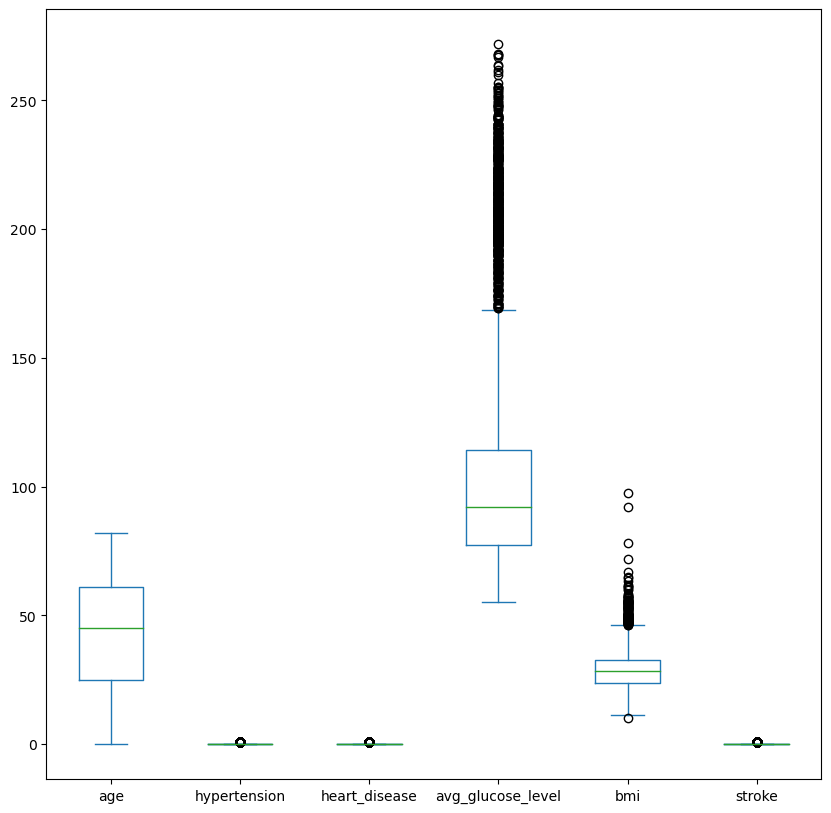

In [12]:
plt.figure(figsize=(10,6))
df.plot(kind='box')
plt.show()

In [13]:
from matplotlib.pyplot import figure 
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor = 'k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

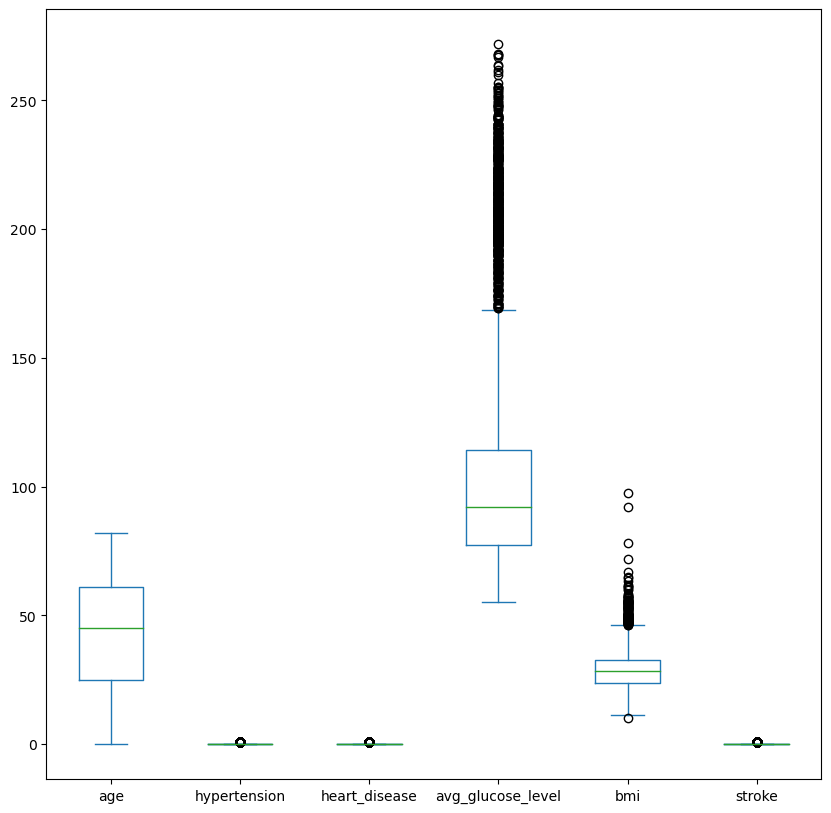

In [14]:
df.plot(kind='box')
plt.show()

In [15]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [16]:
df[df['avg_glucose_level'] > 114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [17]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [20]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [22]:
gender = enc.fit_transform(df['gender'])

In [23]:
smoking_status = enc.fit_transform(df['smoking_status'])
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [24]:
work_type = enc.fit_transform(df['work_type'])
Residence_type = enc.fit_transform(df['Residence_type'])
ever_married = enc.fit_transform(df['ever_married'])

In [25]:
df['work_type'] = work_type

In [26]:
df['Residence_type'] = Residence_type

In [27]:
df['ever_married'] = ever_married

In [28]:
df['smoking_status'] = smoking_status
df['gender'] = smoking_status

In [29]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,2,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,2,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,3,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,2,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [30]:
x = df.drop('stroke', axis=1)
y = df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [32]:
len(x_train)

4088

In [33]:
len(x_test)

1022

# Normalize

In [34]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,1.376908,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,1.071534,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,2.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,2.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,3.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
std = StandardScaler()

In [37]:
x_train_std = std.fit_transform(x_train)
x_test_std  = std.fit_transform(x_test)

In [38]:
x_train_std

array([[ 1.52126922,  0.52597838, -0.3275041 , ..., -0.70868869,
        -0.11992313,  1.52126922],
       [ 0.58945193,  0.52597838, -0.3275041 , ...,  2.76994191,
        -0.86234122,  0.58945193],
       [ 0.58945193, -0.40264483, -0.3275041 , ...,  1.51650464,
        -0.77116707,  0.58945193],
       ...,
       [ 0.58945193, -0.53530528, -0.3275041 , ..., -0.64930605,
         0.86996766,  0.58945193],
       [ 1.52126922,  0.08377685, -0.3275041 , ...,  2.48185885,
         3.39679416,  1.52126922],
       [-1.27418264,  1.10084037, -0.3275041 , ...,  2.32644852,
         1.35188818, -1.27418264]])

In [39]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4152,3,55.0,0,0,1,3,0,73.57,28.0,3
4051,2,55.0,0,0,1,0,1,231.15,22.3,2
5076,2,34.0,0,0,1,2,0,174.37,23.0,2
874,2,80.0,0,0,1,2,0,56.99,26.7,2
3534,2,61.0,0,0,1,2,1,108.18,19.1,2
...,...,...,...,...,...,...,...,...,...,...
2895,2,46.0,0,0,1,2,1,137.77,29.3,2
2763,0,45.0,0,0,1,2,0,63.73,32.0,0
905,2,31.0,0,0,1,2,0,76.26,35.6,2
3980,3,45.0,0,0,1,2,0,218.10,55.0,3


# Traning

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()

In [42]:
dt.fit(x_train_std, y_train)

DecisionTreeClassifier()

In [43]:
dt.feature_importances_

array([0.0360674 , 0.20193936, 0.03978565, 0.0203481 , 0.00860689,
       0.03458533, 0.02366925, 0.35282359, 0.24298266, 0.03919176])

In [44]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [45]:
dt.predict(x_test_std)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
ac_dt = dt.score(x_test_std, y_test)
ac_dt

0.9031311154598826

# logisticRegression

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_std,y_train)

LinearRegression()

In [80]:
lr.predict(x_test)
ac_lr = lr.score(x_test_std,y_test)
ac_lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.08763857285325749

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [51]:
knn.fit(x_train_std,y_train)


KNeighborsClassifier()

In [53]:
Y_pred=knn.predict(x_test_std)
Y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score
ac_knn=accuracy_score(y_test,Y_pred)
ac_knn

0.9403131115459883

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [87]:
rf.fit(x_train_std, y_train)

RandomForestClassifier()

In [88]:
Y_pred = rf.predict(x_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
ac_rf=accuracy_score(y_test,Y_pred)
ac_rf

0.9393346379647749

In [90]:
from sklearn.svm import SVC

In [91]:
svm = SVC()

In [92]:
svm.fit(x_train_std, y_train)

SVC()

In [93]:
Ypred = svm.predict(x_test_std)
Ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
ac_svm = accuracy_score(y_test,Ypred)
ac_svm

0.9412915851272016

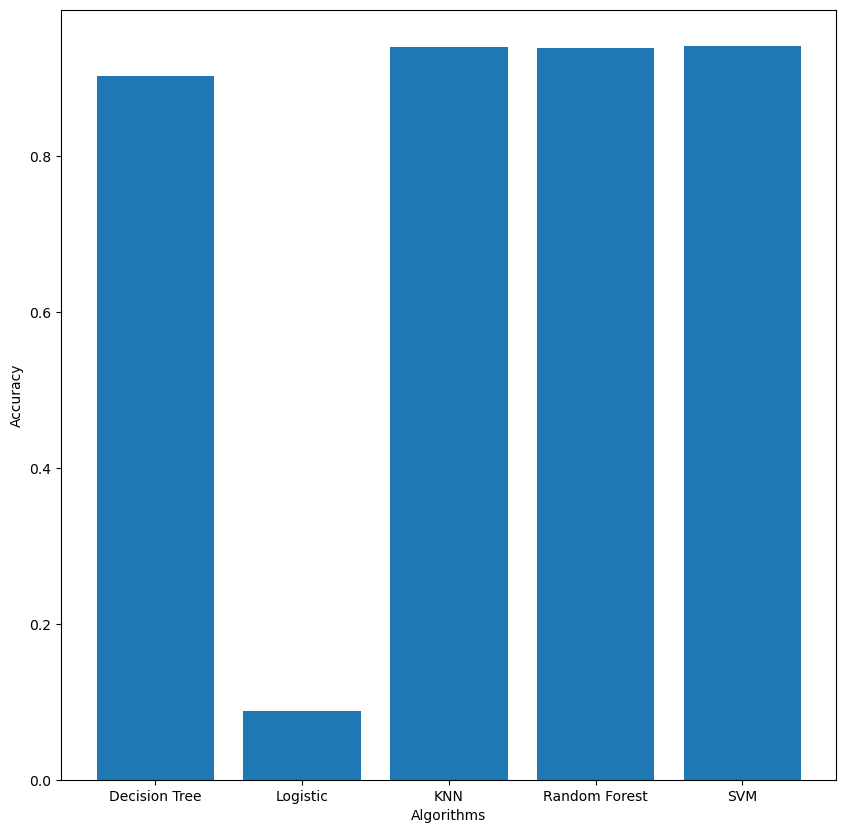

In [96]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_svm])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()